In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
from datetime import datetime, timedelta
import datetime
import time
%matplotlib inline

## Visualize grouping by borough and violation type

In [68]:
crime_df = pd.read_csv('crime_by_boro_type.out', header=None)
crime_df.sort([0, 1], inplace=True)
crime_df

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,0,1,2
17,BRONX,FELONY,294643
14,BRONX,MISDEMEANOR,677215
6,BRONX,VIOLATION,131656
5,BROOKLYN,FELONY,495909
11,BROOKLYN,MISDEMEANOR,844865
13,BROOKLYN,VIOLATION,185439
3,MANHATTAN,FELONY,385885
10,MANHATTAN,MISDEMEANOR,705614
2,MANHATTAN,VIOLATION,124750
7,QUEENS,FELONY,338472


In [69]:
crime_df.iloc[15:][0] = 'UNKNOWN'

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
crime_table = crime_df.pivot_table(values=2, index=[0], columns=[1], aggfunc=np.sum)
Population = [1455444, 2636735, 1644518, 2339150, 474558, 1000000]
crime_table


1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,294643,677215,131656
BROOKLYN,495909,844865,185439
MANHATTAN,385885,705614,124750
QUEENS,338472,544291,128239
STATEN ISLAND,52224,146443,45123
UNKNOWN,290,146,27


In [99]:
crime_table_pc = (crime_table.T / Population).T
crime_table_pc

1,FELONY,MISDEMEANOR,VIOLATION
0,,,
BRONX,0.202442,0.465298,0.090458
BROOKLYN,0.188077,0.320421,0.070329
MANHATTAN,0.234649,0.429070,0.075858
QUEENS,0.144699,0.232688,0.054823
STATEN ISLAND,0.110048,0.308588,0.095084
UNKNOWN,0.000290,0.000146,0.000027


In [71]:
#Calculate fraction by row (e.g. Bronx Felonies / Total Bronx Crimes)
#crime_table.FELONY_FRAC = crime_table.FELONY / crime_table.sum(axis=1)
#crime_table.MISDEMEANOR_FRAC = crime_table.MISDEMEANOR / crime_table.sum(axis=1)
#crime_table.VIOLATION_FRAC = crime_table.VIOLATION / crime_table.sum(axis=1)

In [72]:
#Calculate fraction by column (e.g. Bronx Felonies / Total Felonies)
crime_table.FELONY_FRAC = crime_table['FELONY'] / crime_table['FELONY'].sum()
crime_table.MISDEMEANOR_FRAC = crime_table['MISDEMEANOR'] / crime_table['MISDEMEANOR'].sum()
crime_table.VIOLATION_FRAC = crime_table['VIOLATION'] / crime_table['VIOLATION'].sum()

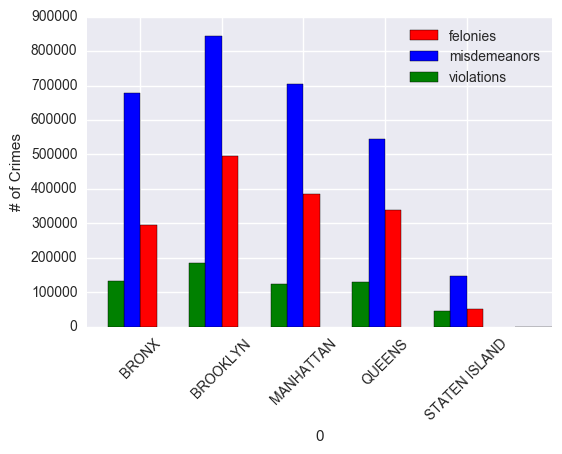

In [73]:
#Total no. of crimes
width = 0.2
crime_table['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('# of Crimes')
plt.legend()
plt.savefig('crimes_by_boro_type.png', format='png')

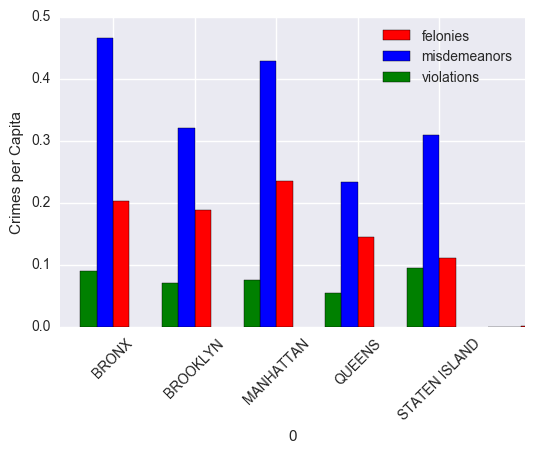

In [100]:
#Crimes per capita
width = 0.2
crime_table_pc['FELONY'].plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table_pc['MISDEMEANOR'].plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table_pc['VIOLATION'].plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS', 'STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Crimes per Capita')
plt.legend()

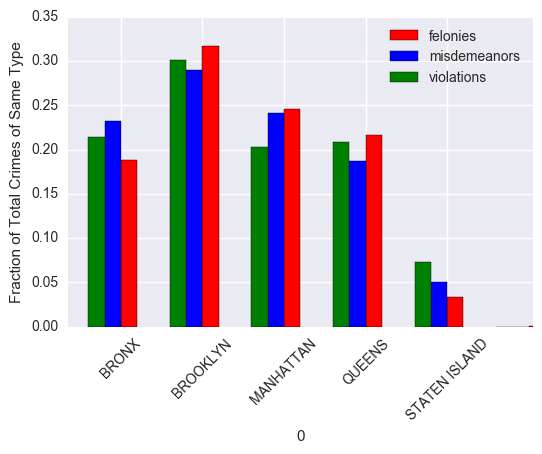

In [74]:
width = 0.2
crime_table.FELONY_FRAC.plot(kind='bar', color='red', width=width, position=0, label = 'felonies')
crime_table.MISDEMEANOR_FRAC.plot(kind='bar', color='blue', width=width, position=1, label = 'misdemeanors')
crime_table.VIOLATION_FRAC.plot(kind='bar', color='green', width=width, position=2, label = 'violations')
plt.xticks(np.arange(0,5),('BRONX', 'BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','UNKNOWN'), rotation=45)
plt.ylabel('Fraction of Total Crimes of Same Type')
plt.legend()
plt.savefig('crimes_by_boro_type_proportions.png', format='png')

## Analyzing grouping by boro, DoW and hour

In [360]:
boro_df = pd.read_csv('by_boro_wkday_hr.out', header=None)
boro_df = boro_df.rename(index=str, columns={0: 'boro', 1: 'weekday', 2: 'hour', 3: 'crimes'})
boro_df.boro = boro_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_df.weekday = pd.to_numeric(boro_df.weekday)
boro_df.hour = pd.to_numeric(boro_df.hour.str.strip(to_strip = ")"))
boro_df.crimes = pd.to_numeric(boro_df.crimes.str.strip(to_strip = ")"))

boro_df = boro_df[boro_df.weekday >= 0]
boro_df = boro_df[boro_df.hour <= 24]
boro_df['wkday_hour'] = 24*boro_df.weekday + boro_df.hour
boro_df.tail()

,boro,weekday,hour,crimes,wkday_hour
1152,STATEN ISLAND,6,20,1858,164
1153,STATEN ISLAND,6,21,1694,165
1154,STATEN ISLAND,6,22,1676,166
1155,STATEN ISLAND,6,23,1459,167
1156,STATEN ISLAND,6,24,11,168


In [361]:
table_boros = boro_df.pivot_table(values='crimes', index=['wkday_hour'], columns=['boro'], aggfunc=np.sum)
table_boros.drop('', inplace=True, axis = 1)
table_boros.head()

boro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
wkday_hour,,,,,
0,6398.0,9858.0,6268.0,6355.0,1581.0
1,4098.0,5981.0,4115.0,4189.0,931.0
2,2866.0,4542.0,3177.0,3196.0,709.0
3,2137.0,3459.0,2757.0,2718.0,485.0
4,1986.0,3104.0,2392.0,2548.0,444.0


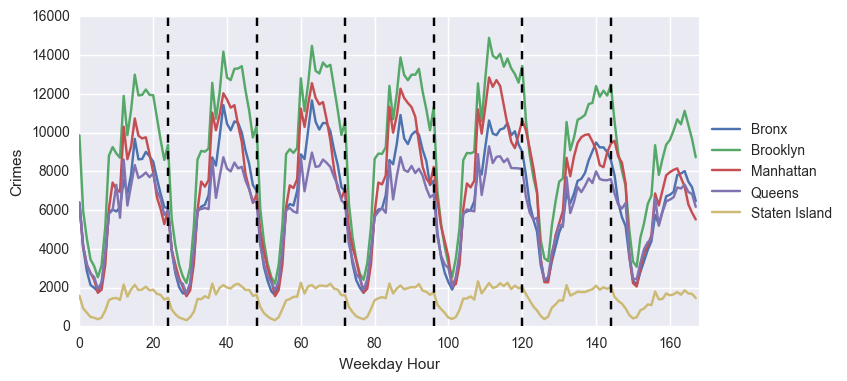

In [351]:
plt.figure(figsize = (8,4))
plt.plot(table_boros.BRONX.iloc[:-1], label='Bronx')
plt.plot(table_boros.BROOKLYN.iloc[:-1], label='Brooklyn')
plt.plot(table_boros.MANHATTAN.iloc[:-1], label='Manhattan')
plt.plot(table_boros.QUEENS.iloc[:-1], label='Queens')
plt.plot(table_boros['STATEN ISLAND'].iloc[:-1], label='Staten Island')
axes = plt.gca()
axes.set_xlim([0,168])

for i in range(1,7):
    plt.axvline(x=24*i,color='k', linestyle='--')
plt.xlabel('Weekday Hour')
plt.ylabel('Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('crimes_by_boro_wkday_hour.png', format='png')

In [353]:
table_boros_normed = table_boros.copy()
for col in table_boros_normed.columns:
    table_boros_normed[col] = table_boros_normed[col] / table_boros.sum(axis=1).values

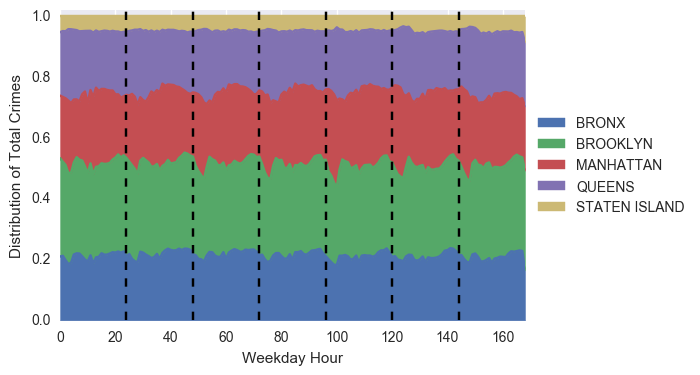

In [359]:
plt.figure(figsize = (8,4))
table_boros_normed.plot.area()
axes = plt.gca()
axes.set_xlim([0,168])
axes.set_ylim([0,1.02])
for i in range(1,7):
    plt.axvline(x=24*i,color='k', linestyle='--')
plt.xlabel('Weekday Hour')
plt.ylabel('Distribution of Total Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('crimes_by_boro_wkday_hour_prop.png', format='png')

#### Brooklyn appears to maintain its daily peak in crime later into the night than the other boros while Manhattan doesn't reach its valley in crime until later in the early morning compared to the other boros.

## Analyzing the grouping by YMD & Boro

In [323]:
boro_ymd_df = pd.read_csv('by_boro_ymd.out', header=None)
boro_ymd_df = boro_ymd_df.rename(index=str, columns={0: 'boro', 1: 'year', 2: 'month', 3: 'day', 4: 'crimes'})
boro_ymd_df.boro = boro_ymd_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_ymd_df.year = pd.to_numeric(boro_ymd_df.year.str.strip().str.strip(to_strip = '('))
boro_ymd_df.month = pd.to_numeric(boro_ymd_df.month)
boro_ymd_df.day = pd.to_numeric(boro_ymd_df.day.str.strip(to_strip = ")"))

boro_ymd_df = boro_ymd_df[boro_ymd_df.year >= 2000]
boro_ymd_df = boro_ymd_df[boro_ymd_df.day >= 1]

boro_ymd_df.crimes = pd.to_numeric(boro_ymd_df.crimes.str.strip(to_strip = ")"))
boro_ymd_df['ymd'] = pd.to_datetime((boro_ymd_df.year*10000+boro_ymd_df.month*100+boro_ymd_df.day).apply(str),format='%Y%m%d')
table_boros_ymd = boro_ymd_df.pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_ymd.drop('', inplace=True, axis = 1)
table_boros_ymd = table_boros_ymd.fillna(0)
table_boros_ymd.head()

boro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
ymd,,,,,
2000-01-01,31.0,39.0,22.0,26.0,10.0
2000-01-02,0.0,1.0,0.0,1.0,0.0
2000-01-04,0.0,1.0,0.0,1.0,1.0
2000-01-05,0.0,2.0,0.0,0.0,0.0
2000-01-07,0.0,1.0,0.0,0.0,0.0


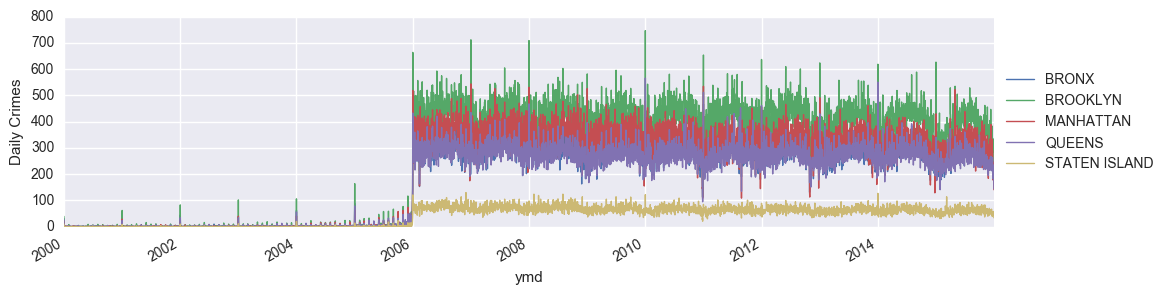

In [324]:
plt.figure(figsize = (12,3))
table_boros_ymd.BRONX.plot(linewidth=1)
table_boros_ymd.BROOKLYN.plot(linewidth=1)
table_boros_ymd.MANHATTAN.plot(linewidth=1)
table_boros_ymd.QUEENS.plot(linewidth=1)
table_boros_ymd['STATEN ISLAND'].plot(linewidth=1)
plt.ylabel('Daily Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('crimes_by_boro_timeseries.png', format='png')

#### There appears to be a data quality issue related to report date where complaints are entered as occuring on the 1st of the month rather than their actual dates. This manifests as an artificial monthly spike in crimes.

### Redo steps taking out 1st of the month entries and restricting year to 2006+

In [327]:
boro_ymd_df = pd.read_csv('by_boro_ymd.out', header=None)
boro_ymd_df = boro_ymd_df.rename(index=str, columns={0: 'boro', 1: 'year', 2: 'month', 3: 'day', 4: 'crimes'})
boro_ymd_df.boro = boro_ymd_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_ymd_df.year = pd.to_numeric(boro_ymd_df.year.str.strip().str.strip(to_strip = '('))
boro_ymd_df.month = pd.to_numeric(boro_ymd_df.month)
boro_ymd_df.day = pd.to_numeric(boro_ymd_df.day.str.strip(to_strip = ")"))

boro_ymd_df = boro_ymd_df[boro_ymd_df.year >= 2006]
boro_ymd_df = boro_ymd_df[boro_ymd_df.day >= 2]

boro_ymd_df.crimes = pd.to_numeric(boro_ymd_df.crimes.str.strip(to_strip = ")"))
boro_ymd_df['ymd'] = pd.to_datetime((boro_ymd_df.year*10000+boro_ymd_df.month*100+boro_ymd_df.day).apply(str),format='%Y%m%d')
table_boros_ymd = boro_ymd_df.pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_ymd.drop('', inplace=True, axis = 1)
table_boros_ymd = table_boros_ymd.fillna(0)

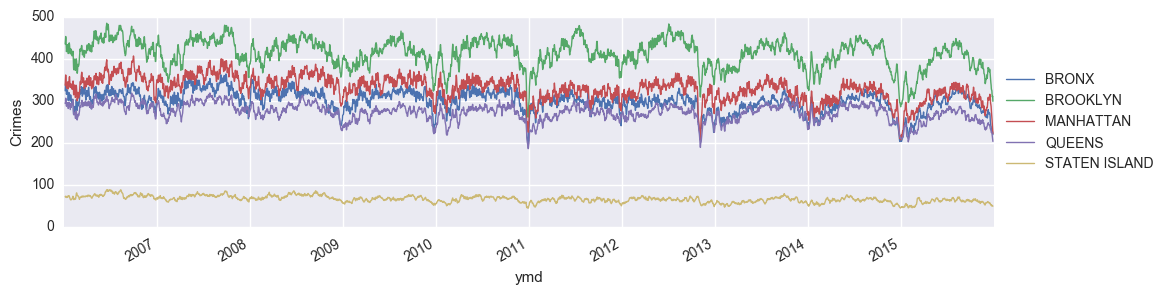

In [328]:
window = 10
plt.figure(figsize = (12,3))
table_boros_ymd.BRONX.rolling(window, center=True).mean().plot(linewidth=1)
table_boros_ymd.BROOKLYN.rolling(window, center=True).mean().plot(linewidth=1)
table_boros_ymd.MANHATTAN.rolling(window, center=True).mean().plot(linewidth=1)
table_boros_ymd.QUEENS.rolling(window, center=True).mean().plot(linewidth=1)
table_boros_ymd['STATEN ISLAND'].rolling(window, center=True).mean().plot(linewidth=1)
plt.ylabel('Crimes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('crimes_by_boro_timeseries_smoothed.png', format='png')

Note: outlier detection will be done excluding 1st of the month entries due to potential unreliability.

In [319]:
#Look for outliers by defining 4-sigma threshold
means = table_boros_ymd.mean(axis=0)
stds = table_boros_ymd.std(axis=0)
up_thresh = means + 4*stds
low_thresh = means - 4*stds

outliers1 = table_boros_ymd > up_thresh
outliers2 = table_boros_ymd < low_thresh
outliers3 = outliers1 | outliers2
outliers3.sum(axis=0)

boro
BRONX            2
BROOKLYN         2
MANHATTAN        5
QUEENS           9
STATEN ISLAND    0
dtype: int64

#### We can view the outlier dates by borough

In [305]:
table_boros_ymd[outliers3['BRONX']]['BRONX']

ymd
2010-12-27    113.0
2012-10-29    131.0
Name: BRONX, dtype: float64

In [304]:
table_boros_ymd[outliers3['BROOKLYN']]['BROOKLYN']

ymd
2010-12-26    185.0
2010-12-27    113.0
Name: BROOKLYN, dtype: float64

In [303]:
table_boros_ymd[outliers3['MANHATTAN']]['MANHATTAN']

ymd
2010-12-27    108.0
2011-08-28    109.0
2012-10-29    128.0
2012-10-30    113.0
2014-12-25    129.0
Name: MANHATTAN, dtype: float64

In [302]:
table_boros_ymd[outliers3['QUEENS']]['QUEENS']

ymd
2010-09-11    449.0
2010-12-26    123.0
2010-12-27     95.0
2011-07-12    431.0
2011-08-15    418.0
2011-08-22    453.0
2011-08-28    135.0
2011-11-07    406.0
2015-01-27    141.0
Name: QUEENS, dtype: float64

In [301]:
table_boros_ymd[outliers3['STATEN ISLAND']]['STATEN ISLAND']

Series([], Name: STATEN ISLAND, dtype: float64)

#### We can also break the outlier dates down by their high or low value made them an outlier and see how many boroughs were affected

In [293]:
high_crime_dict = {}
#initialize dictionary
for entry in table_boros_ymd[outliers1['BRONX']]['BRONX'].index:
    high_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers1['BROOKLYN']]['BROOKLYN'].index:
    high_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers1['MANHATTAN']]['MANHATTAN'].index:
    high_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers1['QUEENS']]['QUEENS'].index:
    high_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers1['STATEN ISLAND']]['STATEN ISLAND'].index:
    high_crime_dict[entry] = 0

for entry in table_boros_ymd[outliers1['BRONX']]['BRONX'].index:
    high_crime_dict[entry] = high_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers1['BROOKLYN']]['BROOKLYN'].index:
    high_crime_dict[entry] = high_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers1['MANHATTAN']]['MANHATTAN'].index:
    high_crime_dict[entry] = high_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers1['QUEENS']]['QUEENS'].index:
    high_crime_dict[entry] = high_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers1['STATEN ISLAND']]['STATEN ISLAND'].index:
    high_crime_dict[entry] = high_crime_dict[entry] + 1

outlier_dates_high = pd.DataFrame(pd.Series(high_crime_dict,name='number of borough'))
outlier_dates_high

,number of borough
2010-09-11,1
2011-07-12,1
2011-08-15,1
2011-08-22,1
2011-11-07,1


In [316]:
low_crime_dict = {}
#initialize dictionary
for entry in table_boros_ymd[outliers2['BRONX']]['BRONX'].index:
    low_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers2['BROOKLYN']]['BROOKLYN'].index:
    low_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers2['MANHATTAN']]['MANHATTAN'].index:
    low_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers2['QUEENS']]['QUEENS'].index:
    low_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers2['STATEN ISLAND']]['STATEN ISLAND'].index:
    low_crime_dict[entry] = 0
    
for entry in table_boros_ymd[outliers2['BRONX']]['BRONX'].index:
    low_crime_dict[entry] = low_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers2['BROOKLYN']]['BROOKLYN'].index:
    low_crime_dict[entry] = low_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers2['MANHATTAN']]['MANHATTAN'].index:
    low_crime_dict[entry] = low_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers2['QUEENS']]['QUEENS'].index:
    low_crime_dict[entry] = low_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers2['STATEN ISLAND']]['STATEN ISLAND'].index:
    low_crime_dict[entry] = low_crime_dict[entry] + 1
outlier_dates_low = pd.DataFrame(pd.Series(low_crime_dict,name='number of borough'))
outlier_dates_low

,number of borough
2010-12-26,2
2010-12-27,4
2011-08-28,2
2012-10-29,2
2012-10-30,1
2014-12-25,1
2015-01-27,1


In [317]:
both_crime_dict = {}
#initialize dictionary
for entry in table_boros_ymd[outliers3['BRONX']]['BRONX'].index:
    both_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers3['BROOKLYN']]['BROOKLYN'].index:
    both_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers3['MANHATTAN']]['MANHATTAN'].index:
    both_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers3['QUEENS']]['QUEENS'].index:
    both_crime_dict[entry] = 0
for entry in table_boros_ymd[outliers3['STATEN ISLAND']]['STATEN ISLAND'].index:
    both_crime_dict[entry] = 0
    
for entry in table_boros_ymd[outliers3['BRONX']]['BRONX'].index:
    both_crime_dict[entry] = both_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers3['BROOKLYN']]['BROOKLYN'].index:
    both_crime_dict[entry] = both_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers3['MANHATTAN']]['MANHATTAN'].index:
    both_crime_dict[entry] = both_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers3['QUEENS']]['QUEENS'].index:
    both_crime_dict[entry] = both_crime_dict[entry] + 1
for entry in table_boros_ymd[outliers3['STATEN ISLAND']]['STATEN ISLAND'].index:
    both_crime_dict[entry] = both_crime_dict[entry] + 1
outlier_dates_all = pd.DataFrame(pd.Series(both_crime_dict,name='number of borough'))
outlier_dates_all

,number of borough
2010-09-11,1
2010-12-26,2
2010-12-27,4
2011-07-12,1
2011-08-15,1
2011-08-22,1
2011-08-28,2
2011-11-07,1
2012-10-29,2
2012-10-30,1


### Outlier Crime for Christmas 2010 & 2014, Hurricane Sandy (2012-10-22 through 2012-11-02) and Hurricane Irene (2011-08-21 through 2011-08-28) most visibly apparent

Interesting that 2011-08-22 (start of Irene) is a high crime outlier but 2011-08-28 (end of Irene) is a low crime outlier.

High crime on 2011-08-15 likely related to flooding on night of 2011-08-14: http://www.nydailynews.com/new-york/new-york-breaks-city-rainfall-record-inches-soaking-city-article-1.945136

High crime on 2011-07-12 possibly related to high profile child abduction/murder on 2011-07-11 and resulting grid search by NYPD/volunteers from 2011-07-11 to 2011-07-13? https://en.wikipedia.org/wiki/Murder_of_Leiby_Kletzky

High crime on 2010-09-11 related to large protests against building Islamic center close to ground zero? http://www.nbcnews.com/id/39112613/ns/us_news-9_11_nine_years_later/t/tensions-flare-nyc-after-ceremonies/#.WPAN3BIrK1s

Only major event around high crime on 2011-11-07 is NYC Marathon on 2011-11-06 http://www.marathonguide.com/results/browse.cfm?MIDD=472111106

## Check if there are significant differences in crimes on Marathon days for Boros

In [25]:
boro_marathon_df = pd.read_csv('marathon_info_boro.out', header=None)
boro_marathon_df.drop([4,5],inplace=True,axis=1)
boro_marathon_df = boro_marathon_df.rename(index=str, columns={0: 'boro', 1: 'year', 2: 'month', 3: 'day', 6: 'test_group', 7: 'crimes'})
boro_marathon_df.boro = boro_marathon_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_marathon_df.year = pd.to_numeric(boro_marathon_df.year.str.strip().str.strip(to_strip = 'datetime.datetime('))
boro_marathon_df.month = pd.to_numeric(boro_marathon_df.month)
boro_marathon_df.day = pd.to_numeric(boro_marathon_df.day)
boro_marathon_df.test_group = pd.to_numeric(boro_marathon_df.test_group.str.strip(to_strip = ")"))
boro_marathon_df = boro_marathon_df[boro_marathon_df.year >= 2006]
boro_marathon_df.crimes = pd.to_numeric(boro_marathon_df.crimes.str.strip(to_strip = ")"))
boro_marathon_df['ymd'] = pd.to_datetime((boro_marathon_df.year*10000+boro_marathon_df.month*100+boro_marathon_df.day).apply(str),format='%Y%m%d')
boro_marathon_df.head(10)

,boro,year,month,day,test_group,crimes,ymd
3,BRONX,2006,8,27,1,264,2006-08-27
4,BRONX,2006,9,3,0,274,2006-09-03
5,BRONX,2006,11,5,1,212,2006-11-05
6,BRONX,2006,11,12,0,260,2006-11-12
7,BRONX,2007,8,5,1,313,2007-08-05
8,BRONX,2007,8,12,0,291,2007-08-12
9,BRONX,2007,11,4,1,282,2007-11-04
10,BRONX,2007,11,11,0,284,2007-11-11
11,BRONX,2008,7,27,1,266,2008-07-27
12,BRONX,2008,8,3,0,293,2008-08-03


In [40]:
table_boros_marathon_test = boro_marathon_df[boro_marathon_df.test_group == 1].pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_marathon_control = boro_marathon_df[boro_marathon_df.test_group == 0].pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
boros_marathon_diff = table_boros_marathon_test.values - table_boros_marathon_control.values
boros_marathon_diff

array([[ -10,  -65,  -22,   -1,  -20],
       [ -48,  -15,   -8,    6,    3],
       [  22,  -32,  -53,   16,   -2],
       [  -2,   46,  -32,   25,    5],
       [ -27,  -69,  -44,   37,    3],
       [ -39,   -5,   -5,   -6,  -10],
       [ -27,   53,   24,   21,   -1],
       [  28,   74,  123,  112,   34],
       [  -4,   31,   63,   55,    0],
       [  13,   13,    5,   -9,    3],
       [  15,   59,   14,   17,    3],
       [ -11,    3,   -4,  -17,  -29],
       [  -4,   48,    5,    1,   22],
       [ -71,  -48, -101,  -65,    6],
       [ -18,  -12,    3,    7,   18],
       [  -9,  -33,  -34,  -14,   -9],
       [  34,   39,  -16,    4,   21],
       [ -10,   -7,  -26,  -39,   10],
       [  37,   25,  -24,  120,    1],
       [  47,   72,  124,   90,    7]])

In [41]:
scipy.stats.ttest_1samp(boros_marathon_diff, 0, axis=0)

Ttest_1sampResult(statistic=array([-0.62556515,  0.89767403, -0.03339295,  1.732473  ,  1.01869919]), pvalue=array([ 0.53904238,  0.38059394,  0.97370955,  0.09939164,  0.32114286]))

The only difference that is statistically significant is in Queens, where crimes are more numerous on raceday at the  $\alpha=0.1$  significance level.

## Test to see if results change if we add in major parades (St. Patricks Day & Veterans Day)

In [42]:
boro_marathon_df = pd.read_csv('parade_info_boro.out', header=None)
boro_marathon_df.drop([4,5],inplace=True,axis=1)
boro_marathon_df = boro_marathon_df.rename(index=str, columns={0: 'boro', 1: 'year', 2: 'month', 3: 'day', 6: 'test_group', 7: 'crimes'})
boro_marathon_df.boro = boro_marathon_df.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
boro_marathon_df.year = pd.to_numeric(boro_marathon_df.year.str.strip().str.strip(to_strip = 'datetime.datetime('))
boro_marathon_df.month = pd.to_numeric(boro_marathon_df.month)
boro_marathon_df.day = pd.to_numeric(boro_marathon_df.day)
boro_marathon_df.test_group = pd.to_numeric(boro_marathon_df.test_group.str.strip(to_strip = ")"))

boro_marathon_df = boro_marathon_df[boro_marathon_df.year >= 2006]


boro_marathon_df.crimes = pd.to_numeric(boro_marathon_df.crimes.str.strip(to_strip = ")"))
boro_marathon_df['ymd'] = pd.to_datetime((boro_marathon_df.year*10000+boro_marathon_df.month*100+boro_marathon_df.day).apply(str),format='%Y%m%d')
boro_marathon_df.head(10)

,boro,year,month,day,test_group,crimes,ymd
1,,2006,3,17,1,2,2006-03-17
2,,2006,3,24,0,3,2006-03-24
5,BRONX,2006,3,17,1,327,2006-03-17
6,BRONX,2006,3,24,0,299,2006-03-24
7,BRONX,2006,8,27,1,264,2006-08-27
8,BRONX,2006,9,3,0,274,2006-09-03
9,BRONX,2006,11,5,1,212,2006-11-05
10,BRONX,2006,11,11,1,304,2006-11-11
11,BRONX,2006,11,12,0,260,2006-11-12
12,BRONX,2006,11,18,0,277,2006-11-18


In [75]:
table_boros_marathon_test = boro_marathon_df[boro_marathon_df.test_group == 1].pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_marathon_control = boro_marathon_df[boro_marathon_df.test_group == 0].pivot_table(values='crimes', index=['ymd'], columns=['boro'], aggfunc=np.sum)
table_boros_marathon_test.drop('', inplace=True, axis = 1)
table_boros_marathon_control.drop('', inplace=True, axis = 1)
#Nov 4 2007 & Nov 11 2007 are both Sunday parade/marathons, so we will count Nov 18, 2007 as a Sunday control against them.
table_boros_marathon_control = table_boros_marathon_control.iloc[:7].append(table_boros_marathon_control.iloc[6]).append(table_boros_marathon_control.iloc[7:])
boros_marathon_diff = table_boros_marathon_test.values - table_boros_marathon_control.values
boros_marathon_diff

array([[  28.,   16.,   14.,   -9.,   11.],
       [ -10.,  -65.,  -22.,   -1.,  -20.],
       [ -48.,  -15.,   -8.,    6.,    3.],
       [  27.,   43.,   20.,   29.,   -4.],
       [ -67., -123.,  -99.,  -80.,  -21.],
       [  22.,  -32.,  -53.,   16.,   -2.],
       [  36.,   29.,  -54.,  -17.,    2.],
       [  38.,  -17.,  -22.,  -42.,   -3.],
       [ -10.,  -31.,   78.,  -18.,   15.],
       [ -27.,  -69.,  -44.,   37.,    3.],
       [ -39.,   -5.,   -5.,   -6.,  -10.],
       [ -11.,   85.,  -61.,  -32.,   -9.],
       [ -55.,   13.,    7.,  -13.,   23.],
       [ -27.,   53.,   24.,   21.,   -1.],
       [  28.,   74.,  123.,  112.,   34.],
       [ -37.,   16.,  -61.,  -10.,  -14.],
       [  11.,    1.,   48.,  -45.,   -7.],
       [  -4.,   31.,   63.,   55.,    0.],
       [  13.,   13.,    5.,   -9.,    3.],
       [ -25.,  -68.,  -48.,  -86.,   -6.],
       [  -6.,  -14.,   29.,    5.,   12.],
       [  15.,   59.,   14.,   17.,    3.],
       [ -11.,    3.,   -4.,  -1

In [76]:
scipy.stats.ttest_1samp(boros_marathon_diff, 0, axis=0)

Ttest_1sampResult(statistic=array([-0.3152913 ,  0.03785344, -0.37340894, -0.2418897 ,  0.81321535]), pvalue=array([ 0.7542655 ,  0.97000271,  0.71091926,  0.81016629,  0.42116083]))

Results are less significant with the added parade dates. This is likely because major parades occur on federal holidays when people are off work and crime rates are possibly lower, while marathons & half marathons occur on non-holiday sundays (typically) and thus don't have the holiday effect. Parade thus might be balancing out the higher crime rates in places like Queens, diluting the significance.